In [1]:
%reload_kedro

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

2021-06-22 16:19:46,313 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2021-06-22 16:19:46,350 - root - INFO - ** Kedro project Foehn fire impact
2021-06-22 16:19:46,351 - root - INFO - Defined global variable `context`, `session` and `catalog`
2021-06-22 16:19:46,359 - root - INFO - Registered line magic `run_viz`


/home/chmony/Apps/anaconda3/envs/foehnfirecorrplot/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sci
from utils import *
import kedro.framework.context

plt.rcParams["figure.figsize"] = (16,9)
sns.set(font_scale=1.6)
sns.set_style("whitegrid")

In [4]:
df = context.catalog.load("fire_data_with_foehn_and_control_variables")

2021-06-22 16:19:47,171 - kedro.io.data_catalog - INFO - Loading data from `fire_data_with_foehn_and_control_variables` (CSVDataSet)...


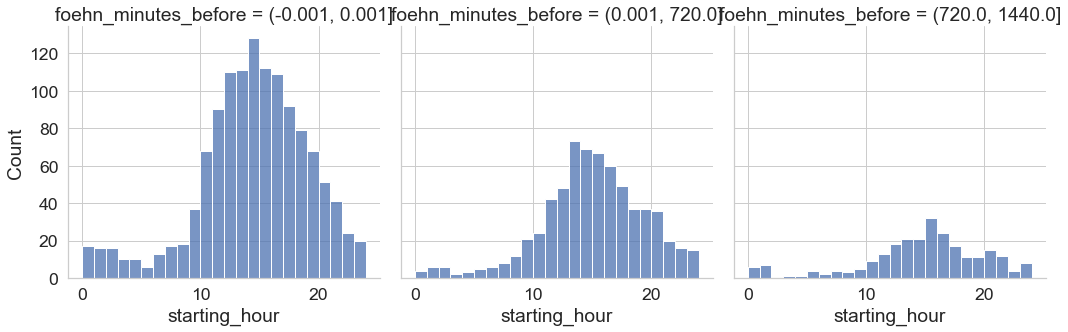

<Figure size 1152x648 with 0 Axes>

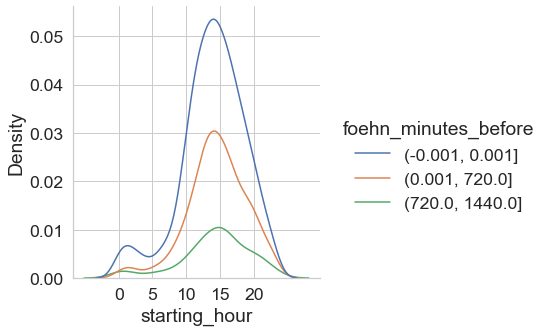

In [5]:
df_startdate = df.copy()
df_startdate["foehn_minutes_before"] = pd.cut(df_startdate["foehn_minutes_24_hour_before"], bins= [-0.001, 0.001] + list(np.arange(12*60,24*60+1, 12*60)))
df_startdate["starting_hour"] = df_startdate["start_date_min"].dt.hour
sns.displot(data=df_startdate, x="starting_hour", col="foehn_minutes_before",bins=range(0,24+1),  kind="hist")#, row="foehn_variant")

plt.figure()
sns.displot(data=df_startdate, x="starting_hour", hue="foehn_minutes_before", kind="kde")#, row="foehn_variant")
plt.xticks(range(0,25,5));

In [6]:
foehn_prevalence_fire_start = (df["foehn_minutes_during_12_hours_after_start_of_fire"] >0).sum()/df["foehn_minutes_during_12_hours_after_start_of_fire"].count()
foehn_prevalence_before_fire_start = (df["foehn_minutes_24_hour_before"] >0).sum()/df["foehn_minutes_24_hour_before"].count()

print(f"Foehn prevalent 12h after start of fire (%): {foehn_prevalence_fire_start}")
print(f"Foehn prevalent 24h before start of fire (%): {foehn_prevalence_before_fire_start}")

Foehn prevalent 12h after start of fire (%): 0.3
Foehn prevalent 24h before start of fire (%): 0.4201101928374656


In [7]:
# from scipy import stats
# df["log_duration_min"] = np.log10(df["duration_min"])
# sns.regplot(x ="foehn_minutes_during_6_hours_after_start_of_fire", y="log_duration_min", data=df)
# df= df.dropna(subset=["foehn_minutes_during_6_hours_after_start_of_fire","log_duration_min"] )
# stats.linregress(df["foehn_minutes_during_6_hours_after_start_of_fire"], df["log_duration_min"])



count    2369.000000
mean       12.086784
std        39.597351
min         0.250000
25%         2.000000
50%         3.500000
75%         6.500000
max       894.250000
Name: duration_min, dtype: float64
Fires longer than 2h (%): 0.7319544111439426
Fires longer than 6h (%): 0.2672013507809202
Fires longer than 12h (%): 0.17728999577880963


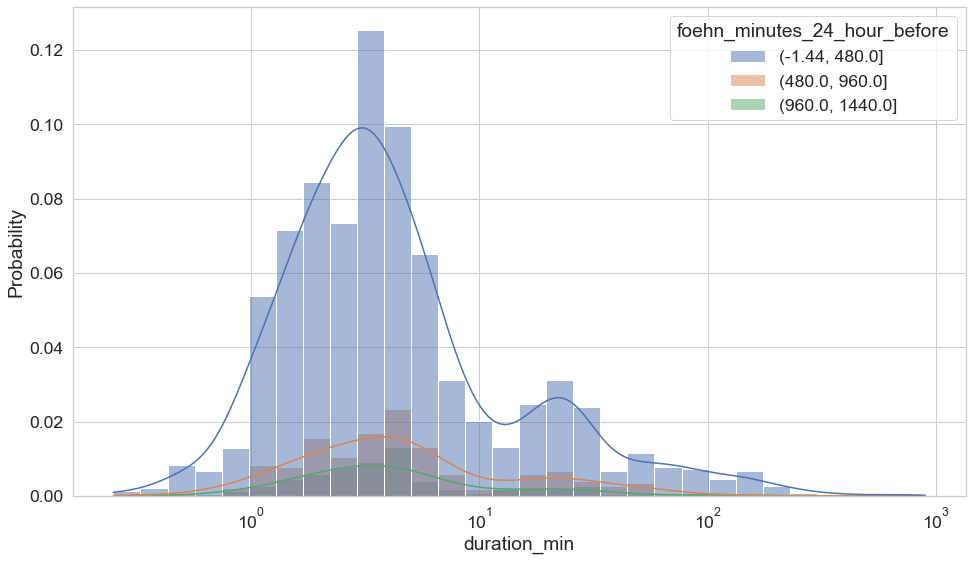

In [8]:
sns.histplot(x=df["duration_min"], hue=pd.cut(df["foehn_minutes_24_hour_before"], bins=3), log_scale=True, bins=30, stat="probability", kde=True)
#plt.figure()
#sns.histplot(df["duration_min"], log_scale=True, bins=30, stat="probability", cumulative=True)
print(df["duration_min"].describe())

print(f"Fires longer than 2h (%): {(df['duration_min']> 2).sum()/df['duration_min'].count()}")
print(f"Fires longer than 6h (%): {(df['duration_min']> 6).sum()/df['duration_min'].count()}")
print(f"Fires longer than 12h (%): {(df['duration_min'] > 12).sum()/df['duration_min'].count()}")
#print(f"Foehn prevalent 24h before start of fire (%): {foehn_prevalence_before_fire_start}")

In [9]:
df.loc[:, "fire_regime"].value_counts(dropna=False, normalize=False)

Winter anthropogenic    1604
Summer anthropogenic     765
Name: fire_regime, dtype: int64

In [10]:
((df["fire_regime"] == "Winter anthropogenic") & (df["foehn_minutes_24_hour_before"]>60)).sum()

615

# After fire ignition

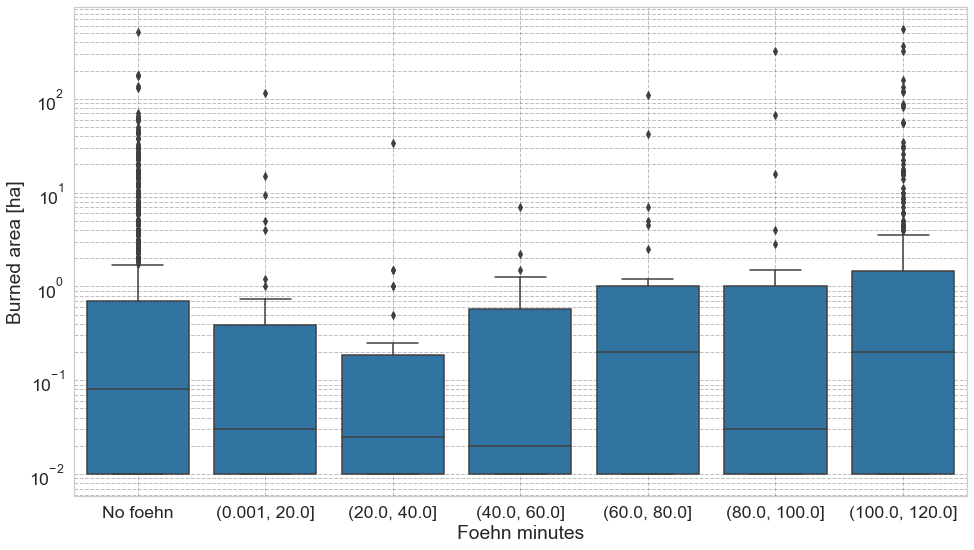

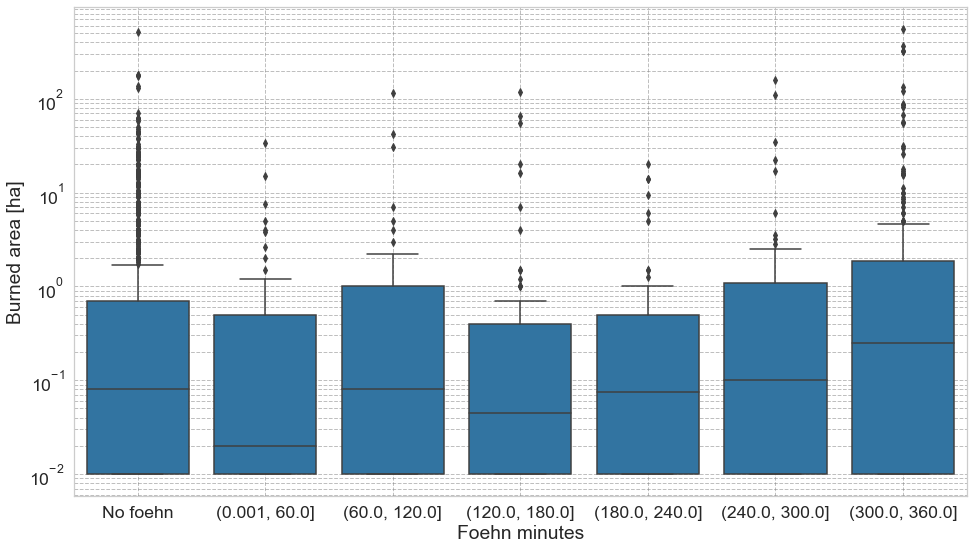

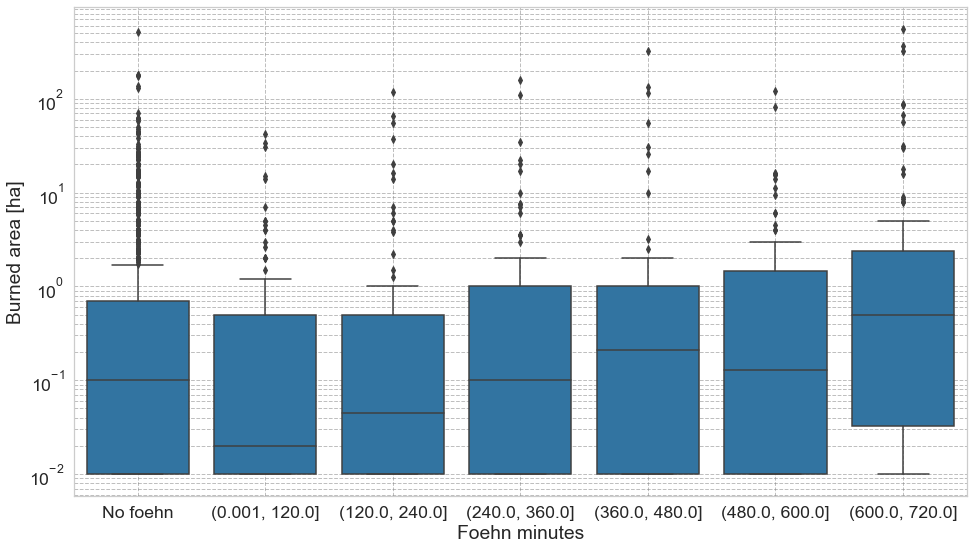

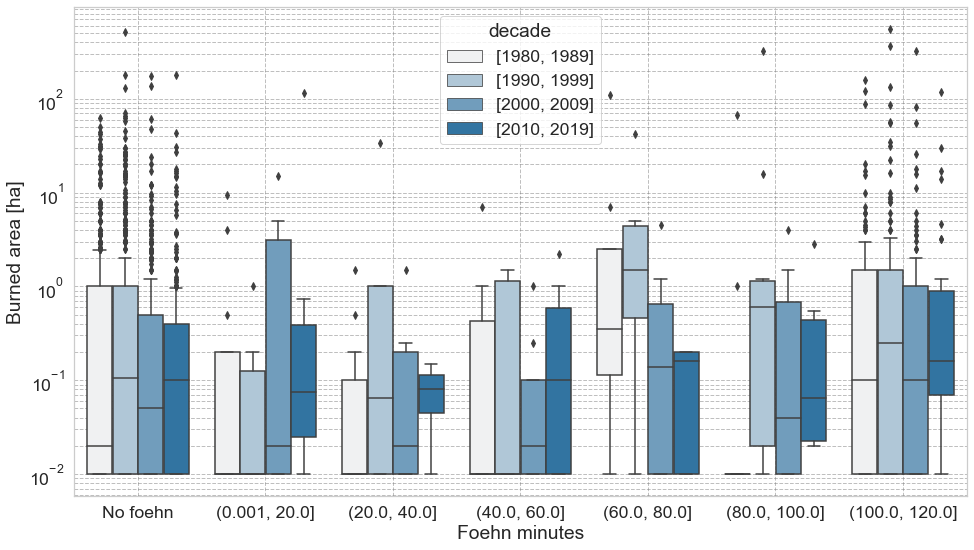

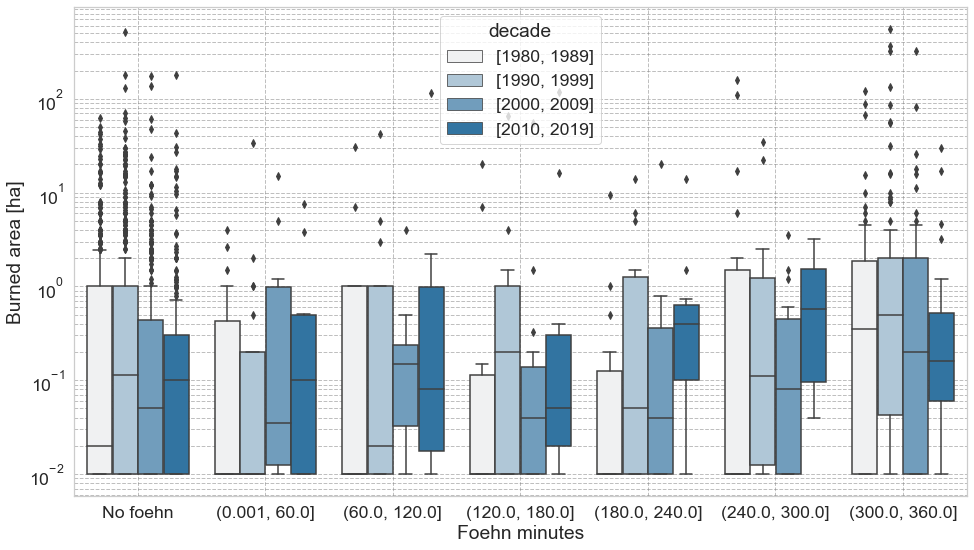

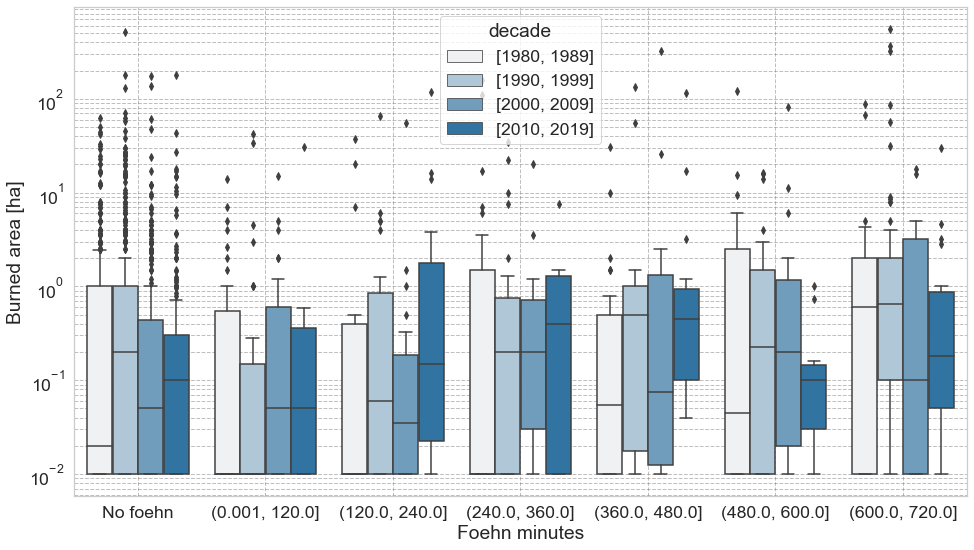

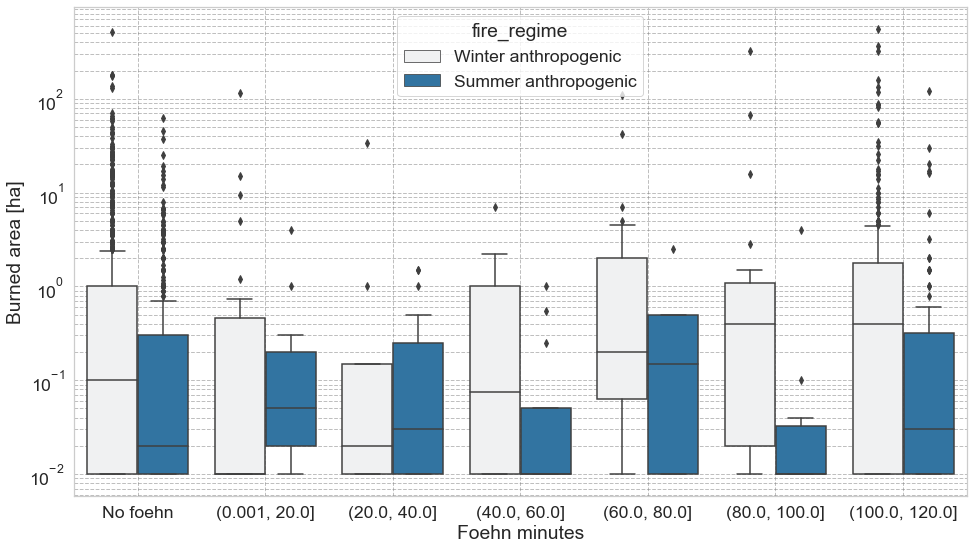

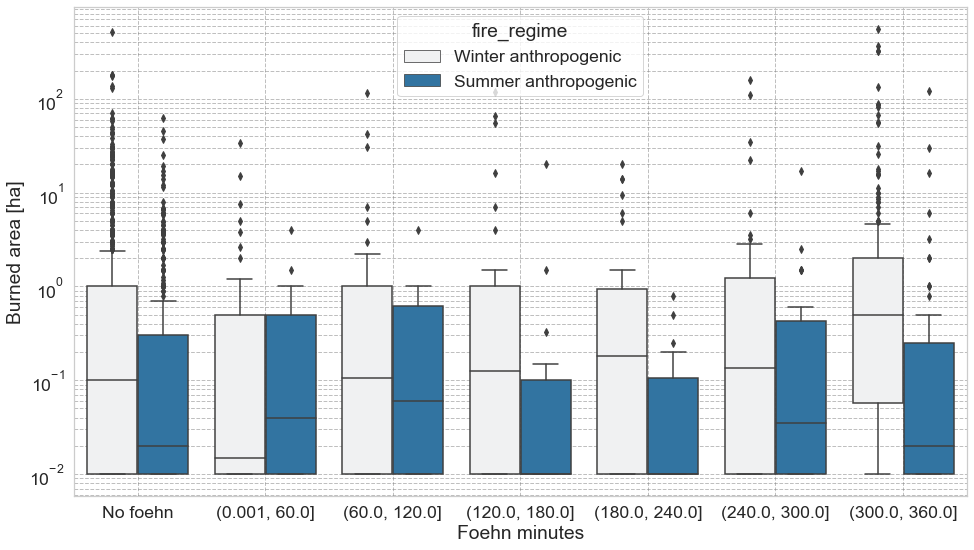

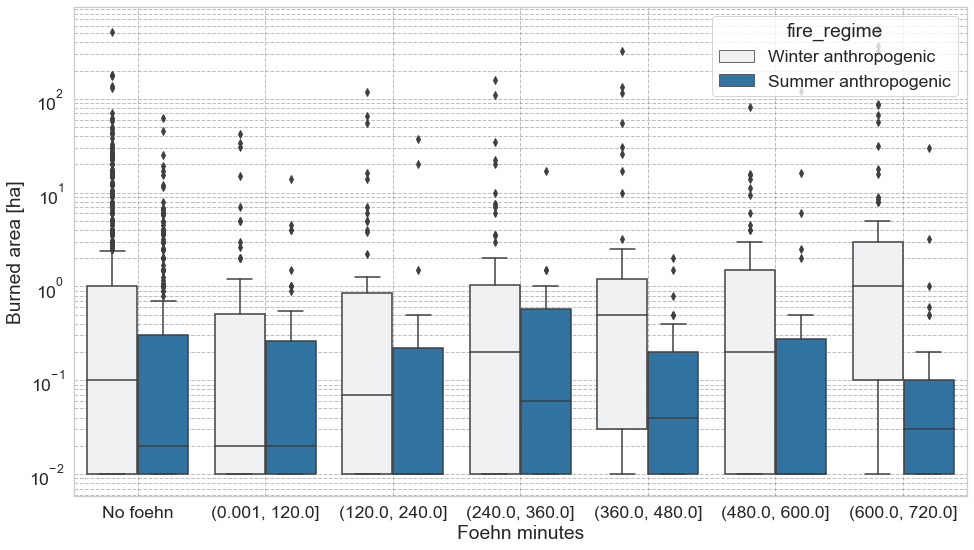

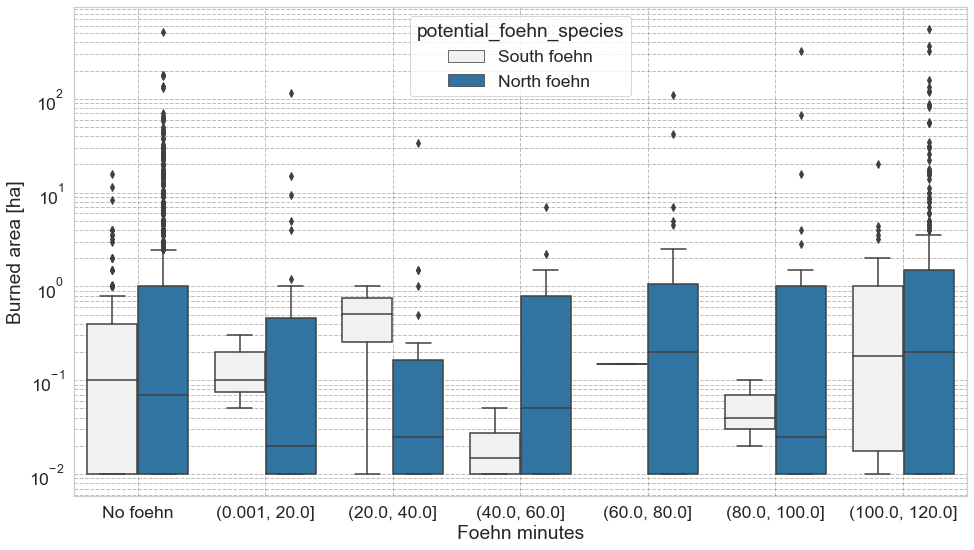

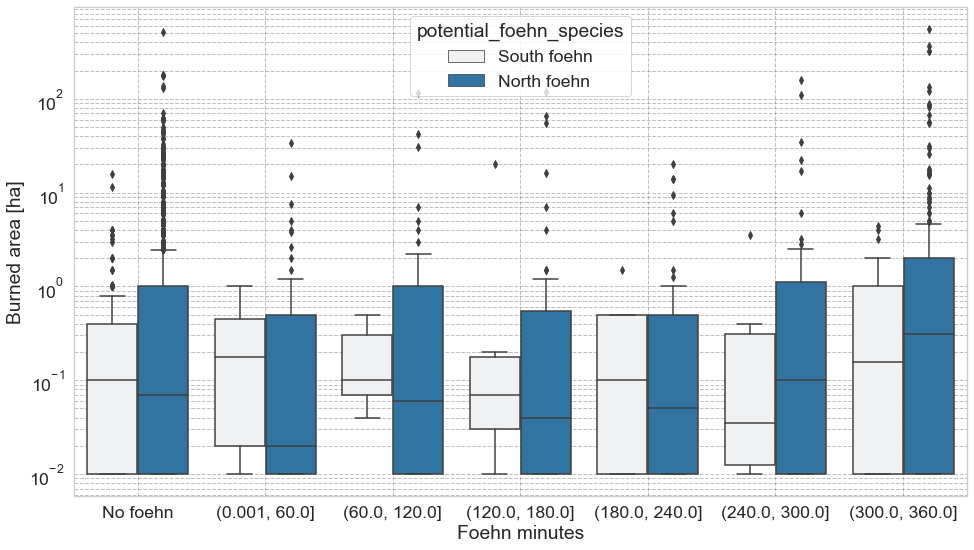

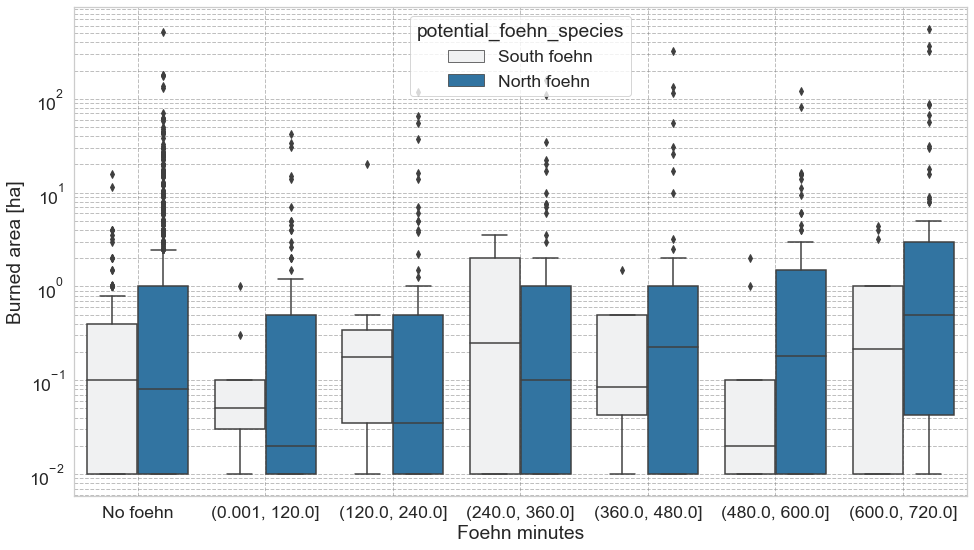

In [11]:
# Plot all (or selected) plots for 6 and 12 hours after fire start
for var in ["", "decade", "fire_regime", "potential_foehn_species"]:
    for hours in [2, 6,12]:
        plot_multiple_binned_burned_area_after_fire_start(df, hours=hours, control_var=var)  

In [12]:
test_multiple_bins_against_no_foehn(df, hours=12)

No-foehn vs. (0.001, 120.0] 	 0.073461 	 0.2
No-foehn vs. (120.0, 240.0] 	 0.384582 	 0.45
No-foehn vs. (240.0, 360.0] 	 0.505568 	 1.0
No-foehn vs. (360.0, 480.0] 	 0.044183 	 2.1
No-foehn vs. (480.0, 600.0] 	 0.29107 	 1.3
No-foehn vs. (600.0, 720.0] 	 0.0 	 5.0


In [13]:
# All fires
for hours in [2, 6,12]:
    test_binary_bins(df, hours=hours)

(2h) non-foehn vs. foehn  0.007415654614027178 	 1.25
(6h) non-foehn vs. foehn  0.005943350321466558 	 1.25
(12h) non-foehn vs. foehn  0.01719596388049715 	 1.0


In [14]:
control_var_categories = {"": "",
                          "fire_regime": ["Winter anthropogenic", "Summer anthropogenic"], 
                          "decade": ["[1980, 1989]", "[1990, 1999]","[2000, 2009]","[2010, 2019]"],
                          "potential_foehn_species": ["North foehn", "South foehn"]}

(6h) non-foehn vs. foehn for Winter anthropogenic 	 0.016511 	 2.25
(6h) non-foehn vs. foehn for Summer anthropogenic 	 0.918101 	 1.0
(12h) non-foehn vs. foehn for Winter anthropogenic 	 0.028291 	 2.0
(12h) non-foehn vs. foehn for Summer anthropogenic 	 0.971233 	 1.0


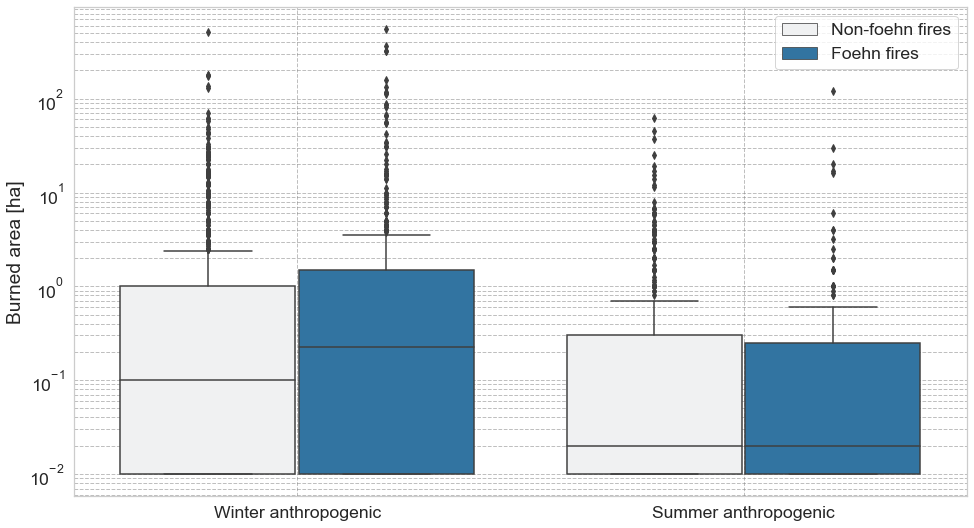

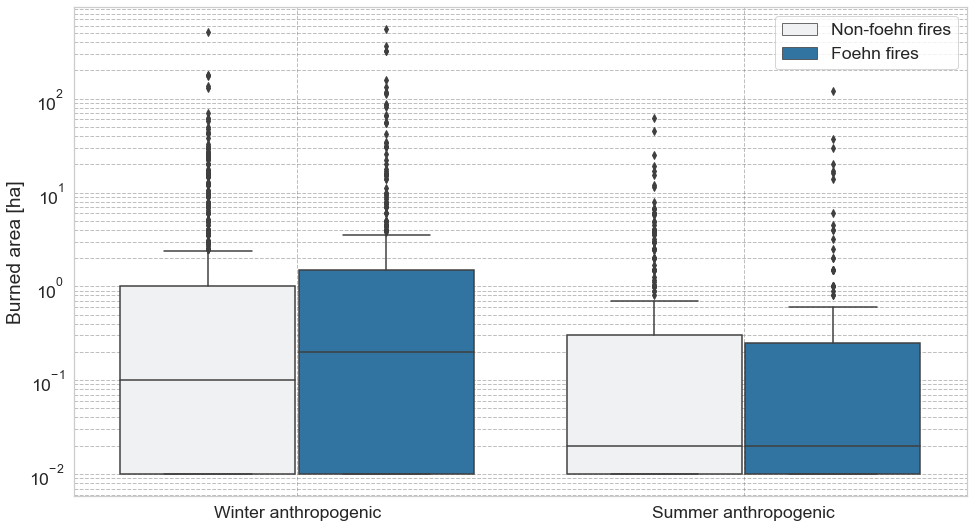

In [15]:
# For different fire regimes regimes
var = "fire_regime"
for hours in [6,12]:
    test_binary_bins(df, hours=hours, control_var=var, categories = control_var_categories[var])
    plot_binary_binned_burned_area_after_fire_start(df, hours=hours,control_var=var)

(6h) non-foehn vs. foehn for North foehn 	 0.011907 	 1.43
(6h) non-foehn vs. foehn for South foehn 	 0.330309 	 1.0
(12h) non-foehn vs. foehn for North foehn 	 0.034677 	 1.25
(12h) non-foehn vs. foehn for South foehn 	 0.316421 	 1.0


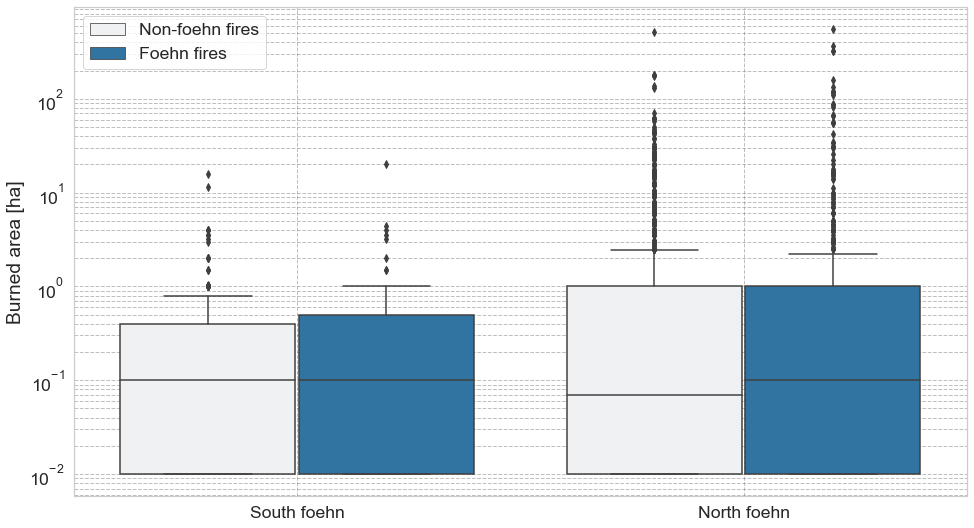

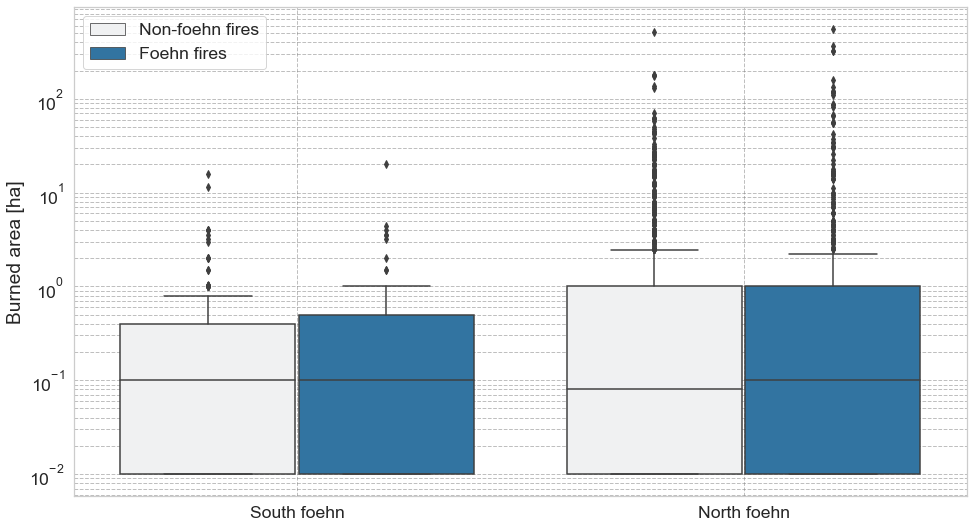

In [16]:
# For different foehn types
var = "potential_foehn_species"
for hours in [6,12]:
    test_binary_bins(df, hours=hours, control_var=var, categories = control_var_categories[var])
    plot_binary_binned_burned_area_after_fire_start(df, hours=hours,control_var=var)

In [17]:
# Test for significant difference between North and South Foehn
var = "potential_foehn_species"
for hours in [6,12]:
    test_foehn_within_variable(df, hours=hours, control_var=var, categories = control_var_categories[var])

(6h)  North foehn  vs.  South foehn 	 0.628374 	 1.0
(12h)  North foehn  vs.  South foehn 	 0.743728 	 1.0


(6h) non-foehn vs. foehn for [1980, 1989] 	 0.788951 	 2.0
(6h) non-foehn vs. foehn for [1990, 1999] 	 0.094417 	 1.74
(6h) non-foehn vs. foehn for [2000, 2009] 	 0.114847 	 1.8
(6h) non-foehn vs. foehn for [2010, 2019] 	 0.007716 	 1.55
(12h) non-foehn vs. foehn for [1980, 1989] 	 0.609997 	 2.5
(12h) non-foehn vs. foehn for [1990, 1999] 	 0.36268 	 1.0
(12h) non-foehn vs. foehn for [2000, 2009] 	 0.10082 	 1.9
(12h) non-foehn vs. foehn for [2010, 2019] 	 0.011469 	 1.5


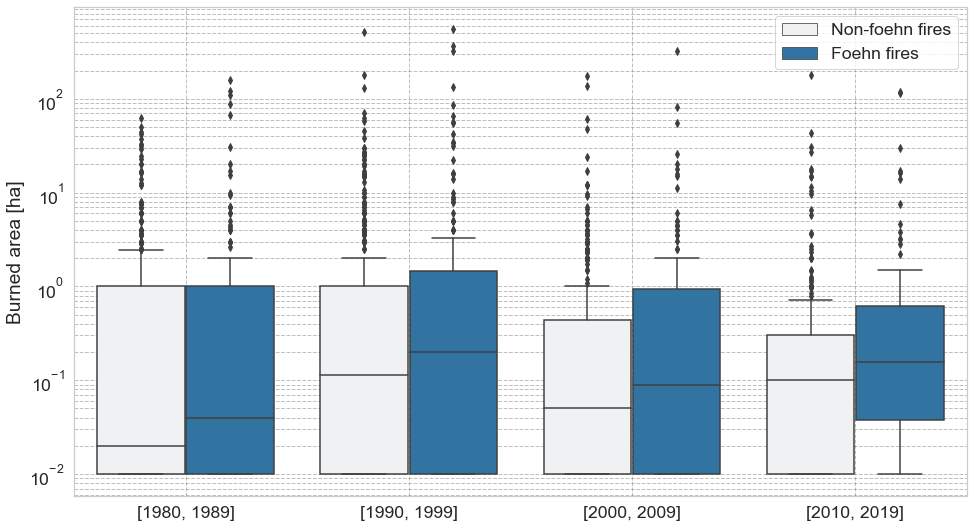

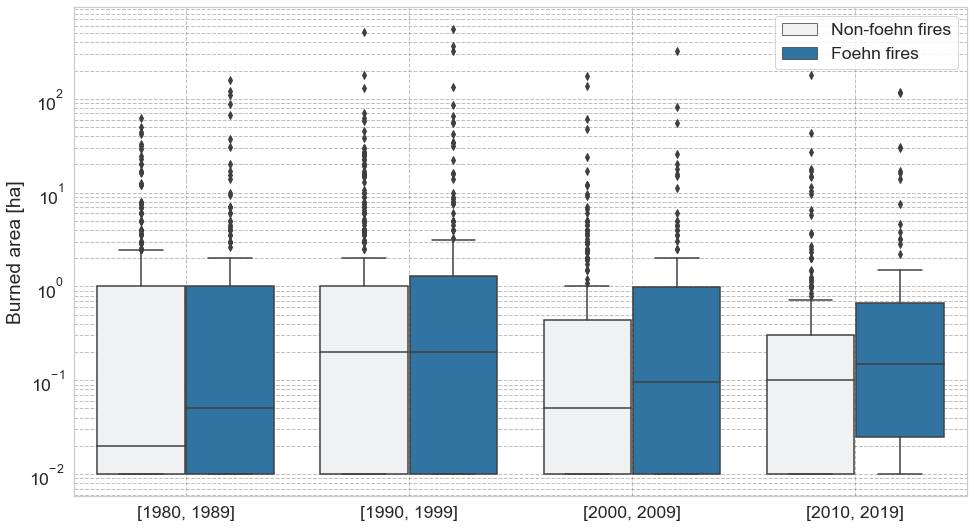

In [18]:
# For different decades
var = "decade"
for hours in [6,12]:
    test_binary_bins(df, hours=hours, control_var=var, categories = control_var_categories[var])
    plot_binary_binned_burned_area_after_fire_start(df, hours=hours,control_var=var)

In [19]:
# Test for significant difference in foehn between decades
var = "decade"
for hours in [6,12]:
    test_foehn_within_variable(df, hours=hours, control_var=var, categories = control_var_categories[var][1:4])

(6h)  [1990, 1999]  vs.  [2000, 2009] 	 0.097581 	 2.222
(6h)  [1990, 1999]  vs.  [2010, 2019] 	 0.714548 	 1.29
(6h)  [2000, 2009]  vs.  [2010, 2019] 	 0.154012 	 0.581
(12h)  [1990, 1999]  vs.  [2000, 2009] 	 0.220816 	 2.105
(12h)  [1990, 1999]  vs.  [2010, 2019] 	 0.972116 	 1.333
(12h)  [2000, 2009]  vs.  [2010, 2019] 	 0.179851 	 0.633


southern_switzerland    2069
northern_switzerland     300
Name: region, dtype: int64
region
southern_switzerland    528
northern_switzerland     59
Name: With foehn influence (6h after start), dtype: int64


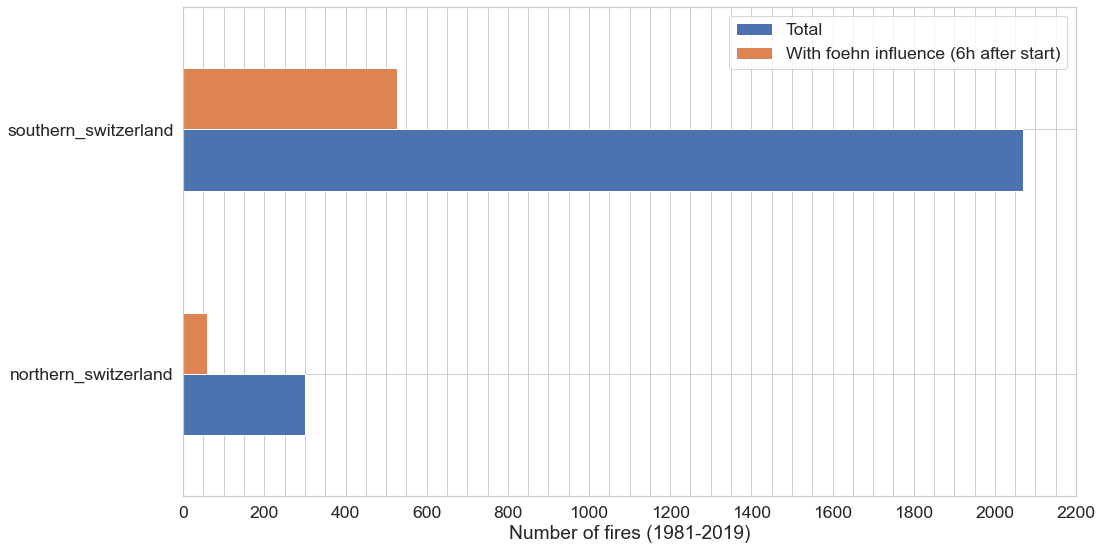

In [20]:
# Predefined regions and stations therein
# Eliminated stations: 
regions = context.params["regions"]

for region in regions.keys():
    for station in regions[region]:
        df.loc[(df["abbreviation"] == station), "region"] = region
    
df_total = df.groupby("region").count()["total [ha]"].rename("Total")
df_onlyfoehn = df.loc[df["foehn_minutes_during_6_hours_after_start_of_fire"]>0, :].groupby("region").count()["total [ha]"].rename("With foehn influence (6h after start)")
pd.concat([df_total, df_onlyfoehn], axis=1).plot(kind="barh")
plt.xlabel("Number of fires (1981-2019)")
plt.ylabel("")
plt.xticks(range(0,2250, 50), labels=[str(i) if i%200 == 0 else "" for i in range(0,2250, 50)])
print(df["region"].value_counts(dropna=False, normalize=False))

print(df_onlyfoehn.sort_values(ascending=False))

## Wind strength influence

In [ ]:
bins_dict = {6: [2.5,14.9,27.6,52], 12: [1,10.7,21,52]}
#bins_dict = {6: [5,10,15,20], 12: [5,10,15,20]}
for region in regions.keys():
    print(region)
    for hour in [6,12]:
        test_foehn_strength(df.loc[df["region"] == region, :], hours=hour, strength_var="FF", bins=bins_dict[hour])
    break  

northern_switzerland
Amount of foehn-influenced fires:  53
(2h) (7.5, 27.0] (3) vs. (27.0, 52.1] (31) 	 0.808106 	 0.7
(2h) (7.5, 27.0] (3) vs. (52.1, 95.0] (18) 	 0.365712 	 3.65
(2h) (27.0, 52.1] (31) vs. (52.1, 95.0] (18) 	 0.345361 	 5.214
Amount of foehn-influenced fires:  59
(6h) (7.5, 27.0] (4) vs. (27.0, 52.1] (36) 	 0.250297 	 3.333
(6h) (7.5, 27.0] (4) vs. (52.1, 95.0] (18) 	 0.201643 	 12.167
(6h) (27.0, 52.1] (36) vs. (52.1, 95.0] (18) 	 0.363722 	 3.65
Amount of foehn-influenced fires:  64
(12h) (3.0, 21.0] (4) vs. (21.0, 35.0] (16) 	 0.603272 	 1.6
(12h) (3.0, 21.0] (4) vs. (35.0, 95.0] (43) 	 0.434476 	 3.0
(12h) (21.0, 35.0] (16) vs. (35.0, 95.0] (43) 	 0.645268 	 1.875


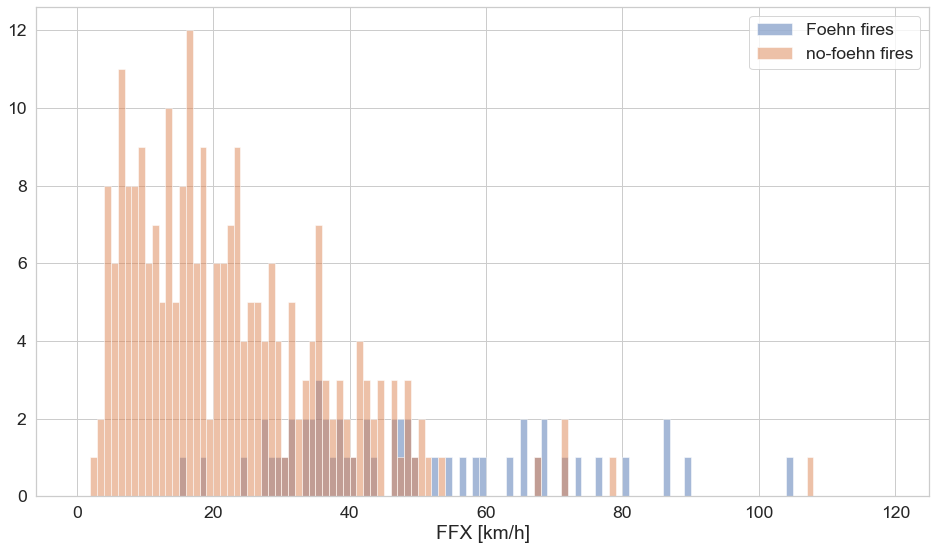

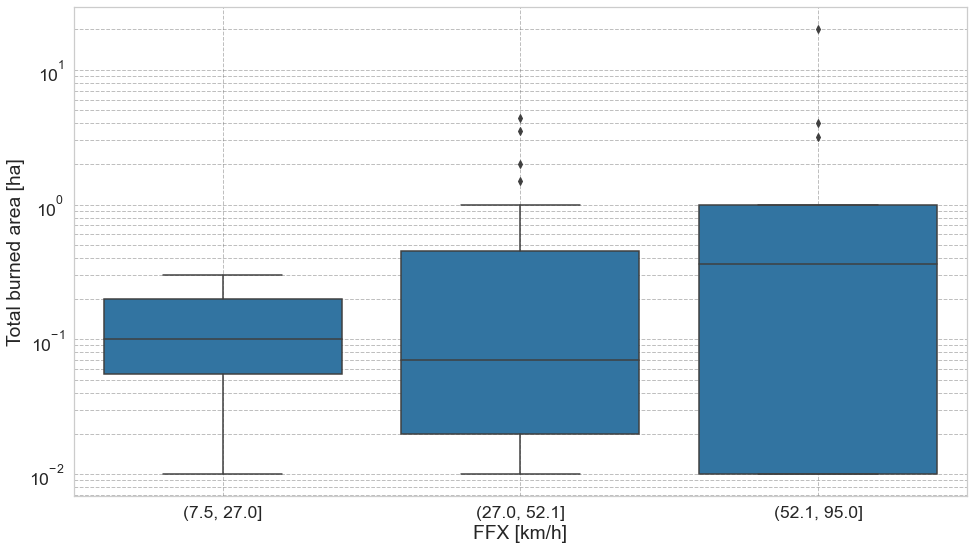

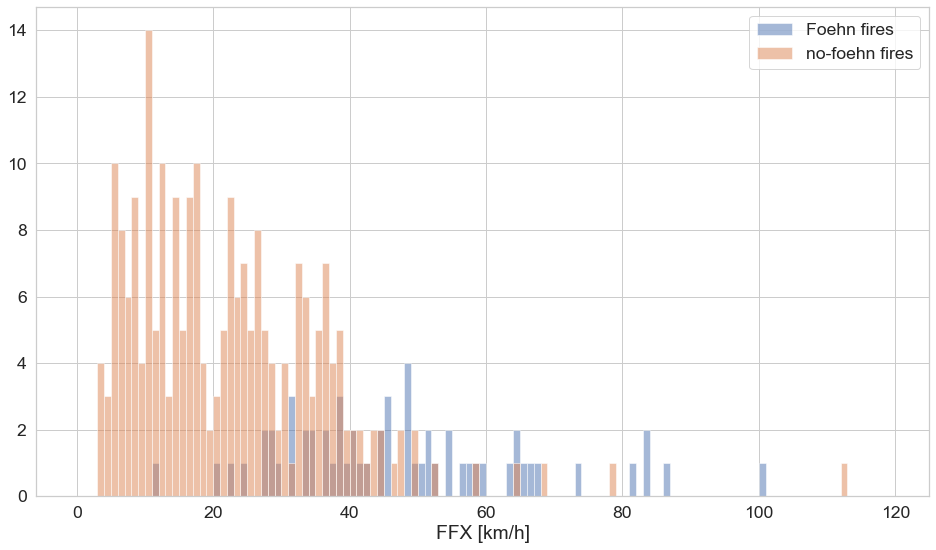

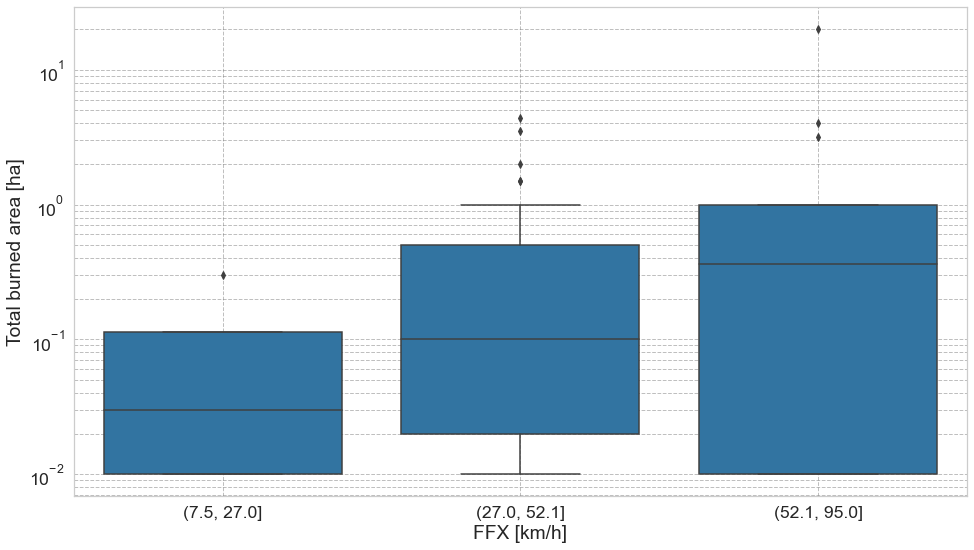

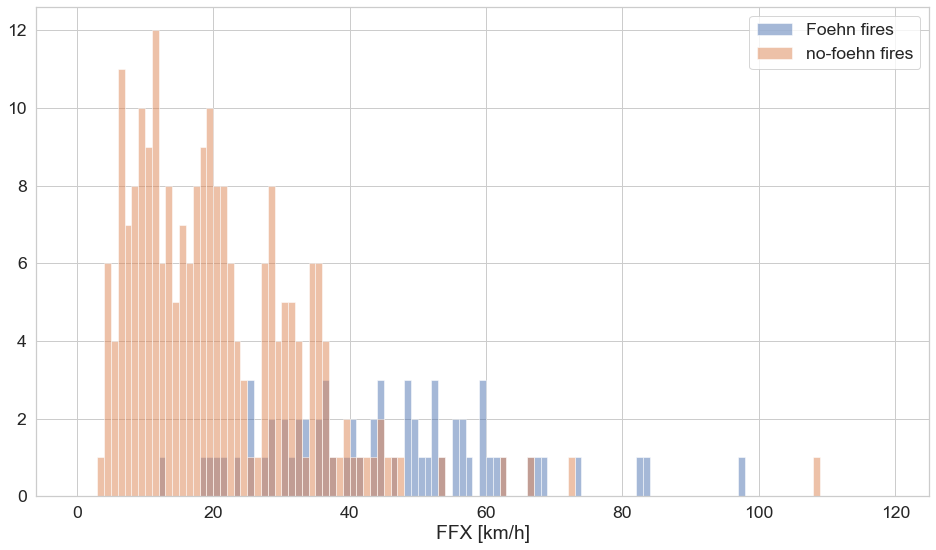

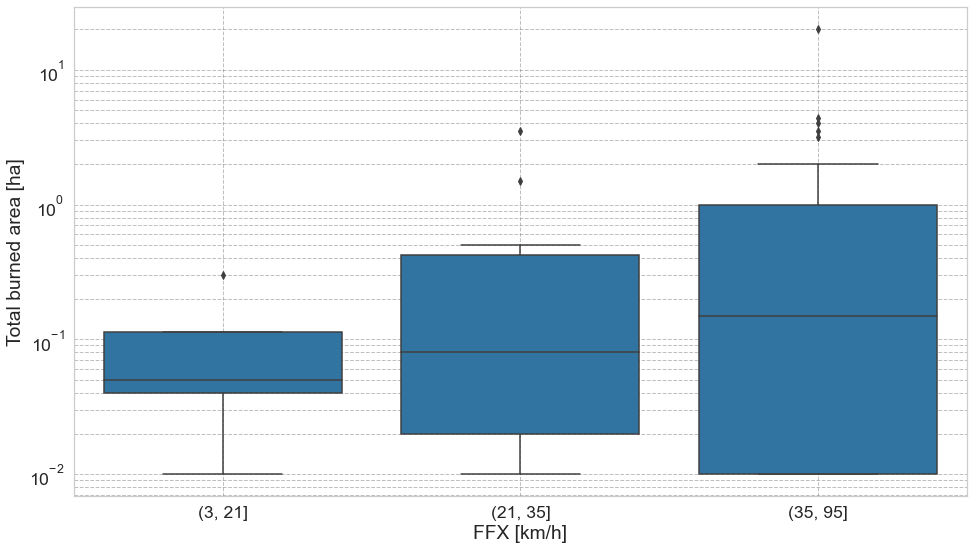

In [22]:
bins_dict = {2: [7.5,27,52.1,95],6: [7.5,27,52.1,95], 12: [3,21,35,95]}
#bins_dict = {6: [15,20, 25, 30], 12: [10,15,20, 25]}
for region in regions.keys():
    print(region)
    for hour in [2, 6,12]:
        test_foehn_strength(df.loc[df["region"] == region, :], hours=hour, strength_var="FFX", bins=bins_dict[hour])
    break

### Compare to non-foehn

northern_switzerland
(6h) Amount of foehn-influenced fires:  59
(6h) Amount of non-foehn-influenced fires:  233
(6h) (10.0, 15.0] (foehnfires: 14), (nofoehnfires: 48) 	 0.423882
(6h) (15.0, 20.0] (foehnfires: 12), (nofoehnfires: 33) 	 0.161868
(12h) Amount of foehn-influenced fires:  64
(12h) Amount of non-foehn-influenced fires:  225
(12h) (10.0, 15.0] (foehnfires: 16), (nofoehnfires: 43) 	 0.669928
(12h) (15.0, 20.0] (foehnfires: 14), (nofoehnfires: 10) 	 0.379775


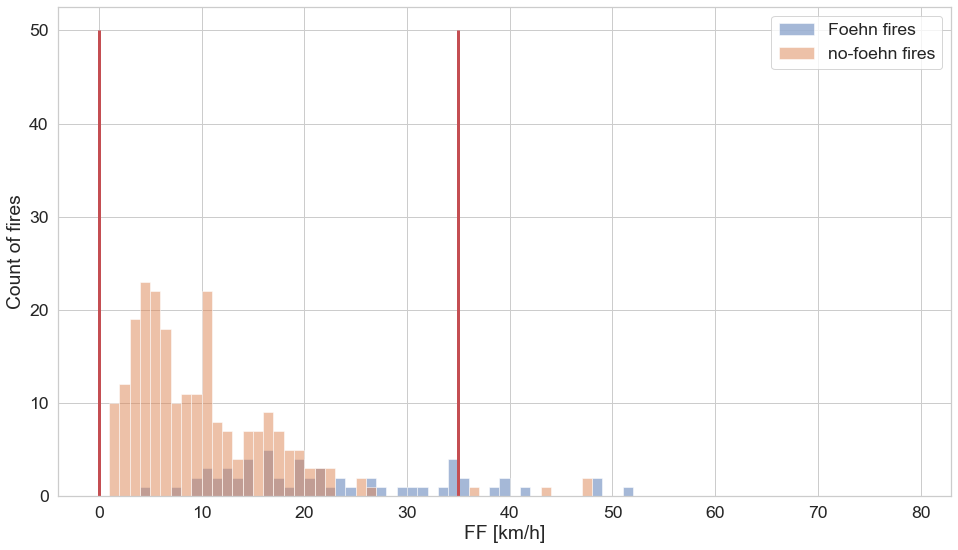

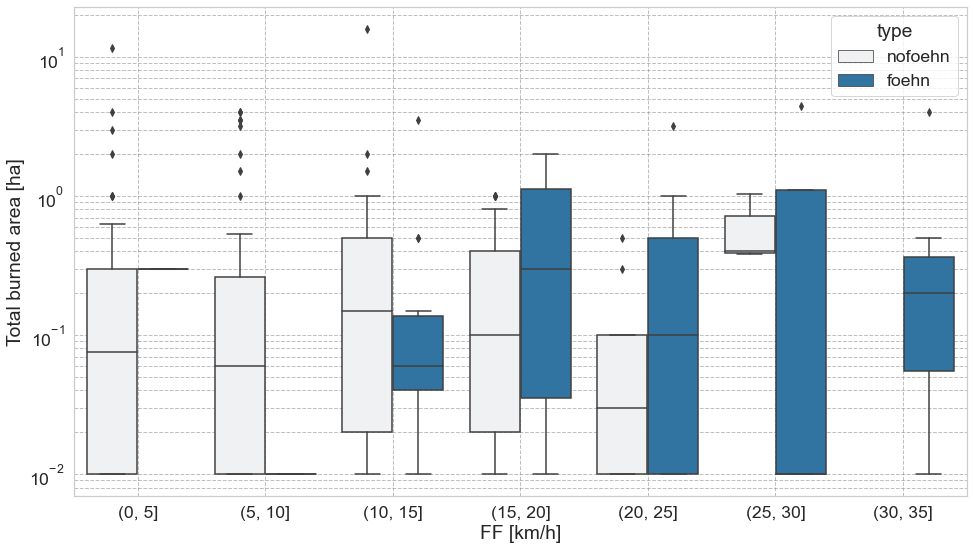

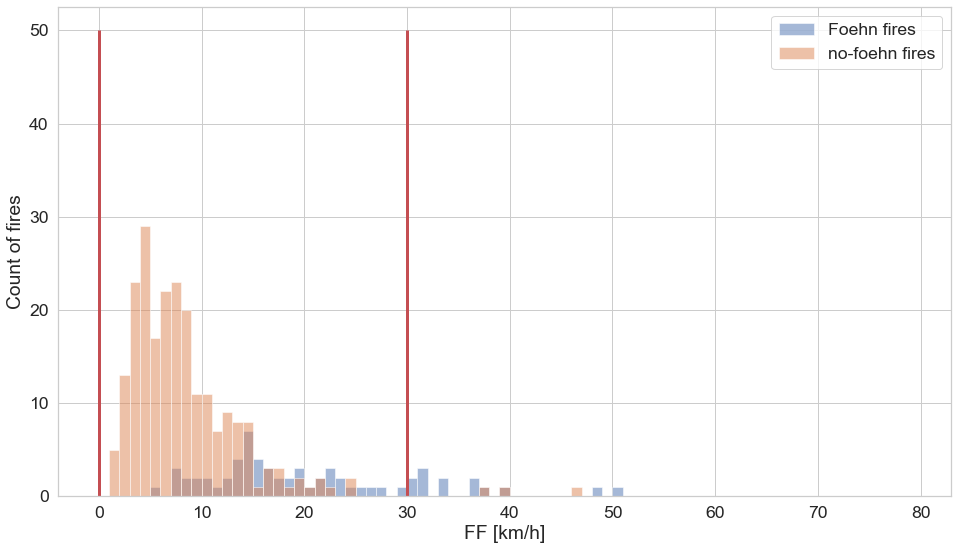

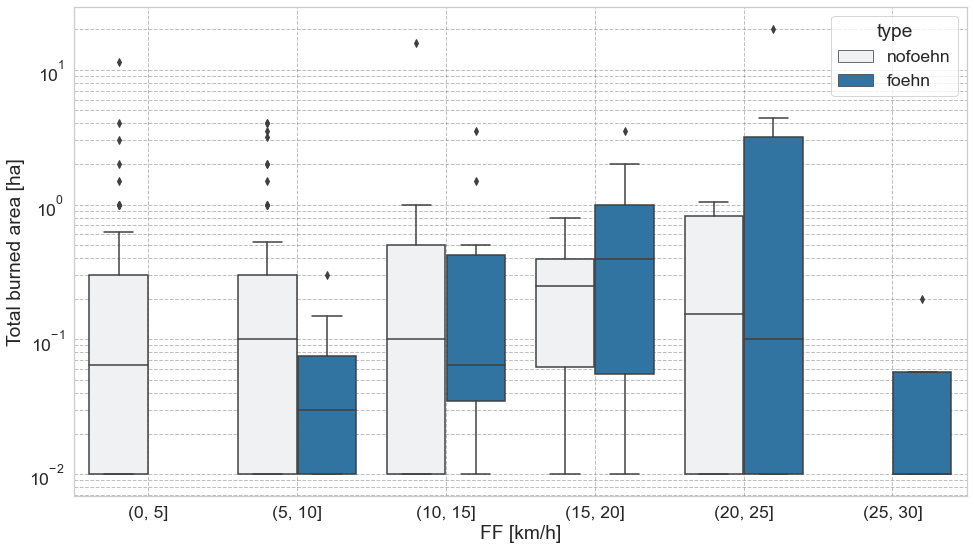

In [23]:
# OLD: bins_dict = {6: [5,6,11,60], 12: [0,6,10,60]}
bins_dict = {6: range(0,35+1,5), 12: range(0,30+1,5)}
for region in regions.keys():
    print(region)
    for hour in [6,12]:
        test_foehn_strength_foehn_nofoehn(df.loc[df["region"] == region, :].copy(), hours=hour, strength_var="FF", bins=bins_dict[hour])
    break

southern_switzerland
(2h) Amount of foehn-influenced fires:  487
(2h) Amount of non-foehn-influenced fires:  1354
(2h) (10.0, 15.0] (foehnfires: 25), (nofoehnfires: 290) 	 0.675346
(2h) (15.0, 20.0] (foehnfires: 30), (nofoehnfires: 219) 	 0.520028
(2h) (20.0, 25.0] (foehnfires: 71), (nofoehnfires: 151) 	 0.208808
(2h) (25.0, 30.0] (foehnfires: 79), (nofoehnfires: 78) 	 0.060586
(2h) (30.0, 35.0] (foehnfires: 65), (nofoehnfires: 24) 	 0.541749
(2h) (35.0, 40.0] (foehnfires: 56), (nofoehnfires: 13) 	 0.225405
(6h) Amount of foehn-influenced fires:  528
(6h) Amount of non-foehn-influenced fires:  1313
(6h) (10.0, 15.0] (foehnfires: 32), (nofoehnfires: 365) 	 0.425037
(6h) (15.0, 20.0] (foehnfires: 61), (nofoehnfires: 193) 	 0.183343
(6h) (20.0, 25.0] (foehnfires: 95), (nofoehnfires: 113) 	 0.63873
(6h) (25.0, 30.0] (foehnfires: 92), (nofoehnfires: 49) 	 0.513254
(6h) (30.0, 35.0] (foehnfires: 54), (nofoehnfires: 15) 	 0.748928
(12h) Amount of foehn-influenced fires:  575
(12h) Amount of n

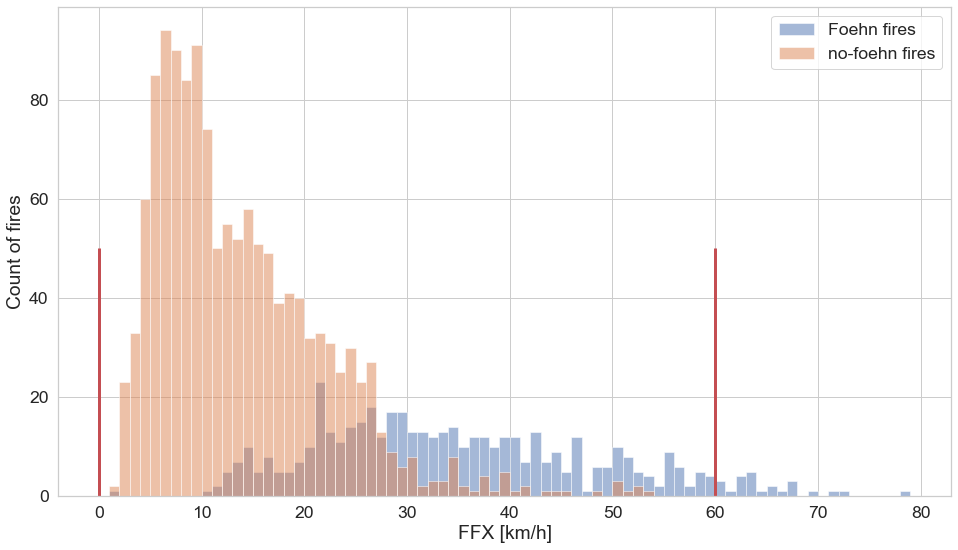

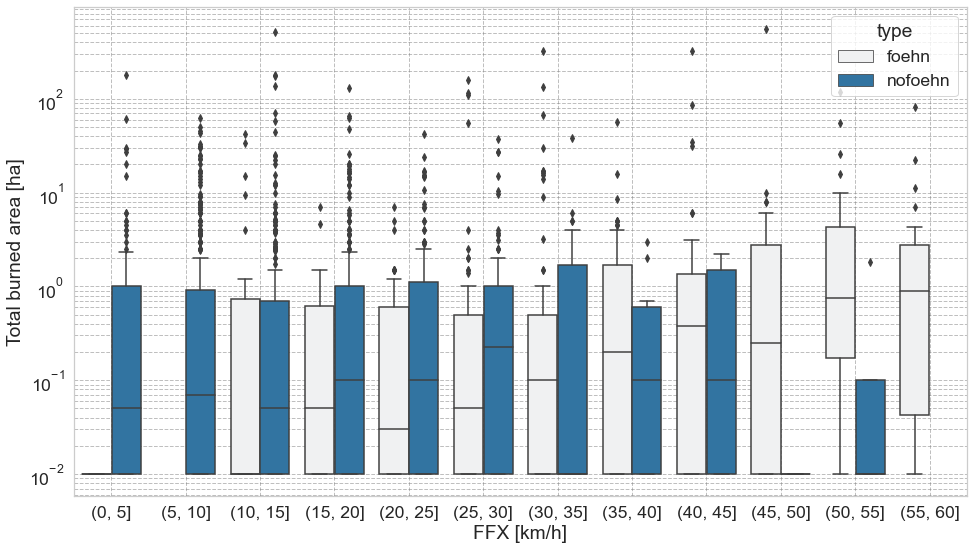

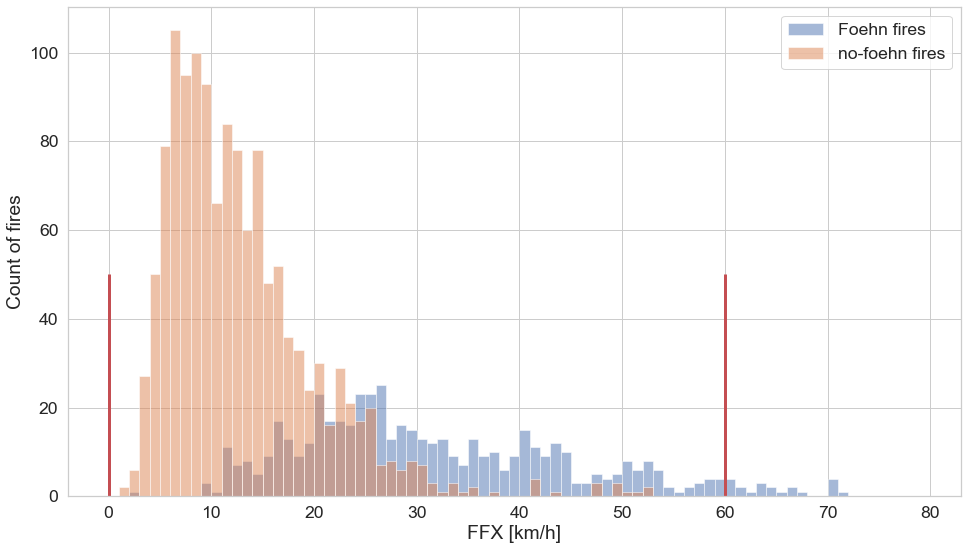

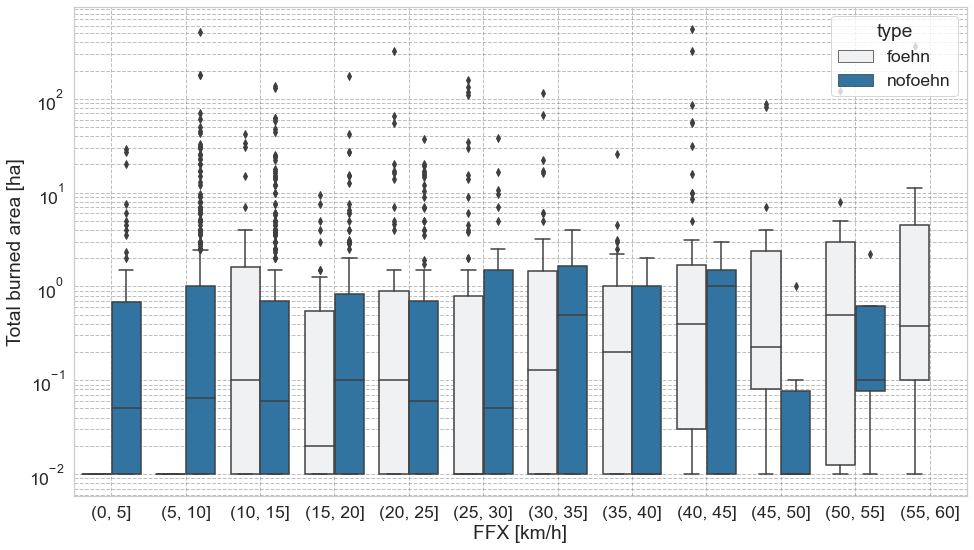

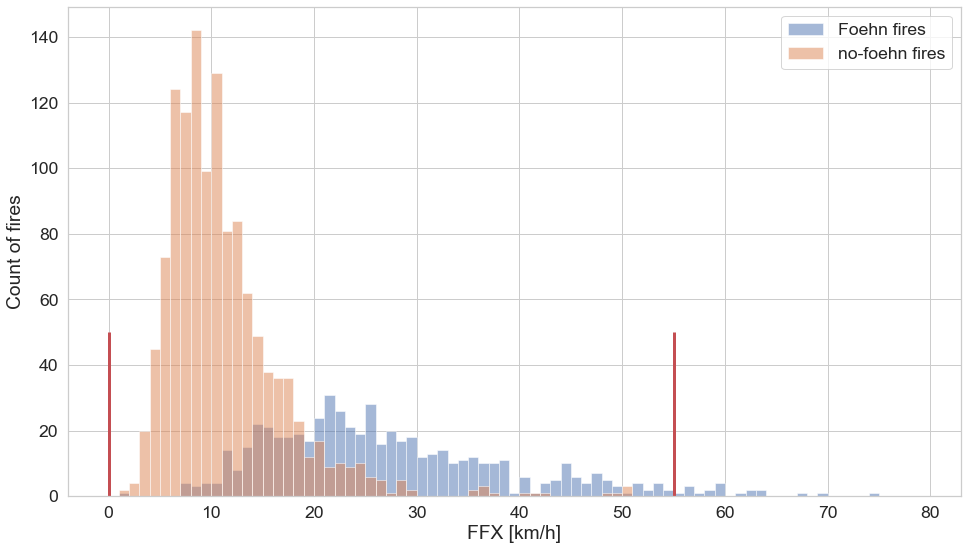

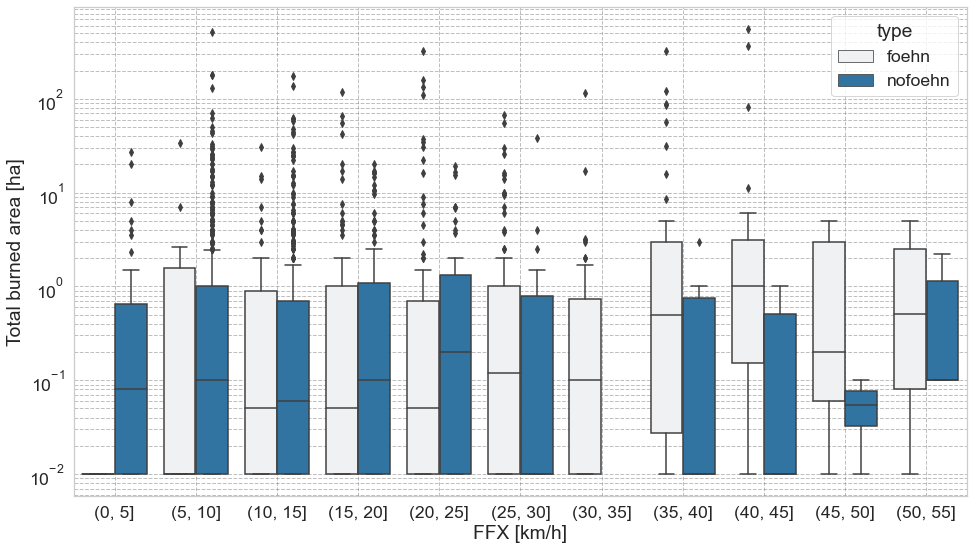

In [24]:
# OLD: bins_dict = {6: [5,6,11,60], 12: [0,6,10,60]}
bins_dict = {2: range(0,60+1,5), 6: range(0,60+1,5), 12: range(0,55+1,5)}
for region in ["southern_switzerland"]:
    print(region)
    for hour in [2, 6,12]:
        test_foehn_strength_foehn_nofoehn(df.loc[df["region"] == region, :].copy(), hours=hour, strength_var="FFX", bins=bins_dict[hour], quantile="mean")
    break

# Before fire ignition

In [25]:
df_foehn = context.catalog.load("foehn_data_prepared")

2021-06-22 16:21:03,379 - kedro.io.data_catalog - INFO - Loading data from `foehn_data_prepared` (CSVDataSet)...


In [26]:
df_rain = context.catalog.load("rain_data")

2021-06-22 16:21:24,914 - kedro.io.data_catalog - INFO - Loading data from `rain_data` (CSVDataSet)...


In [27]:
# Since rain data goes from 0700 to 0700 the next day (Swiss time). Move to file at some point.
df_rain["date"] = df_rain["date"] + pd.Timedelta(hours=14) + pd.Timedelta(days=1)

In [28]:
df_merge = pd.merge(df_foehn, df_rain, on ="date", how="left")
#df_merge["date"] = df_merge["date"] + pd.Timedelta(hours=-24*5)

In [39]:
df_merge.loc[df_merge["ROB_foehn"].notnull(), "ROB_foehn"].value_counts()

0.0    1690568
1.0     253967
Name: ROB_foehn, dtype: int64

In [310]:
# # Before fire start
# df_daily = pd.DataFrame(index=pd.date_range("1981-01-01", "2019-12-31"))
# df_fire_date = df.copy()
# df_fire_date.index = df["start_date_min"].dt.date.astype(np.datetime64)
# df_daily = df_daily.join(df_fire_date, how="left").reset_index()

# df_daily = df_daily.drop_duplicates(subset="index", keep="first")
# df_daily = df_daily.loc[df_daily["total [ha]"].notnull(), :].reset_index(drop=True)

# for region in ["southern_switzerland", "northern_switzerland"]:
#     print(region)
#     plot_binned_fire_count_before_fire_start_single_station_daily(df_daily.loc[df_daily["region"] == region, :], df_foehn=df_merge, hours=24, stations_in_region=regions[region])

,index,ID fire,ID definit,definition,canton,ID municip,municipali,municipa_1,ID current,current mu,...,FFX_q90_during_6_hours_after_start_of_fire,foehn_minutes_during_12_hours_after_start_of_fire,FF_mean_during_12_hours_after_start_of_fire,FFX_mean_during_12_hours_after_start_of_fire,FFX_q75_during_12_hours_after_start_of_fire,FFX_q90_during_12_hours_after_start_of_fire,fire_regime,ID Cause,potential_foehn_species,decade
0,1981-01-01,1.981010e+11,1.0,forest fire,TI,11684.0,5146.0,Astano,11684.0,5146.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Winter anthropogenic,NaN,North foehn,"[1980, 1989]"
1,1981-01-02,1.981010e+11,1.0,forest fire,TI,12436.0,5118.0,Minusio,12436.0,5118.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Winter anthropogenic,NaN,North foehn,"[1980, 1989]"
2,1981-01-03,1.981010e+11,1.0,forest fire,TI,11492.0,5161.0,Cademario,11492.0,5161.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Winter anthropogenic,NaN,North foehn,"[1980, 1989]"
3,1981-01-04,1.981010e+11,1.0,forest fire,TI,13078.0,5215.0,Pregassona,15628.0,5192.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Winter anthropogenic,NaN,North foehn,"[1980, 1989]"
4,1981-01-05,1.981011e+11,1.0,forest fire,TI,13251.0,5250.0,Chiasso,13251.0,5250.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Winter anthropogenic,NaN,North foehn,"[1980, 1989]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,2019-07-06,2.019071e+11,1.0,forest fire,TI,11719.0,5061.0,Airolo,11719.0,5061.0,...,31.65,0.0,10.370833,17.637500,25.675,30.56,Summer anthropogenic,NaN,North foehn,"[2010, 2019]"
1669,2019-07-19,2.019072e+11,1.0,forest fire,TI,10404.0,5135.0,Vogorno,10404.0,5135.0,...,15.15,0.0,3.400000,5.450000,7.300,14.29,Summer anthropogenic,NaN,North foehn,"[2010, 2019]"
1670,2019-08-16,2.019082e+11,1.0,forest fire,TI,16078.0,5002.0,Bellinzona,16078.0,5002.0,...,20.90,0.0,5.220833,8.804167,15.775,19.73,Summer anthropogenic,NaN,North foehn,"[2010, 2019]"
1671,2019-09-24,2.019092e+11,1.0,forest fire,TI,11719.0,5061.0,Airolo,11719.0,5061.0,...,6.65,0.0,2.838889,6.113889,6.900,14.99,Summer anthropogenic,1.0,North foehn,"[2010, 2019]"


southern_switzerland
LUG
MAG
OTL
PIO
ROB
LUG
MAG
OTL
PIO
ROB
northern_switzerland
VIS
MVE
AIG
CHU
ALT
GLA
STG
VIS
MVE
AIG
CHU
ALT
GLA
STG


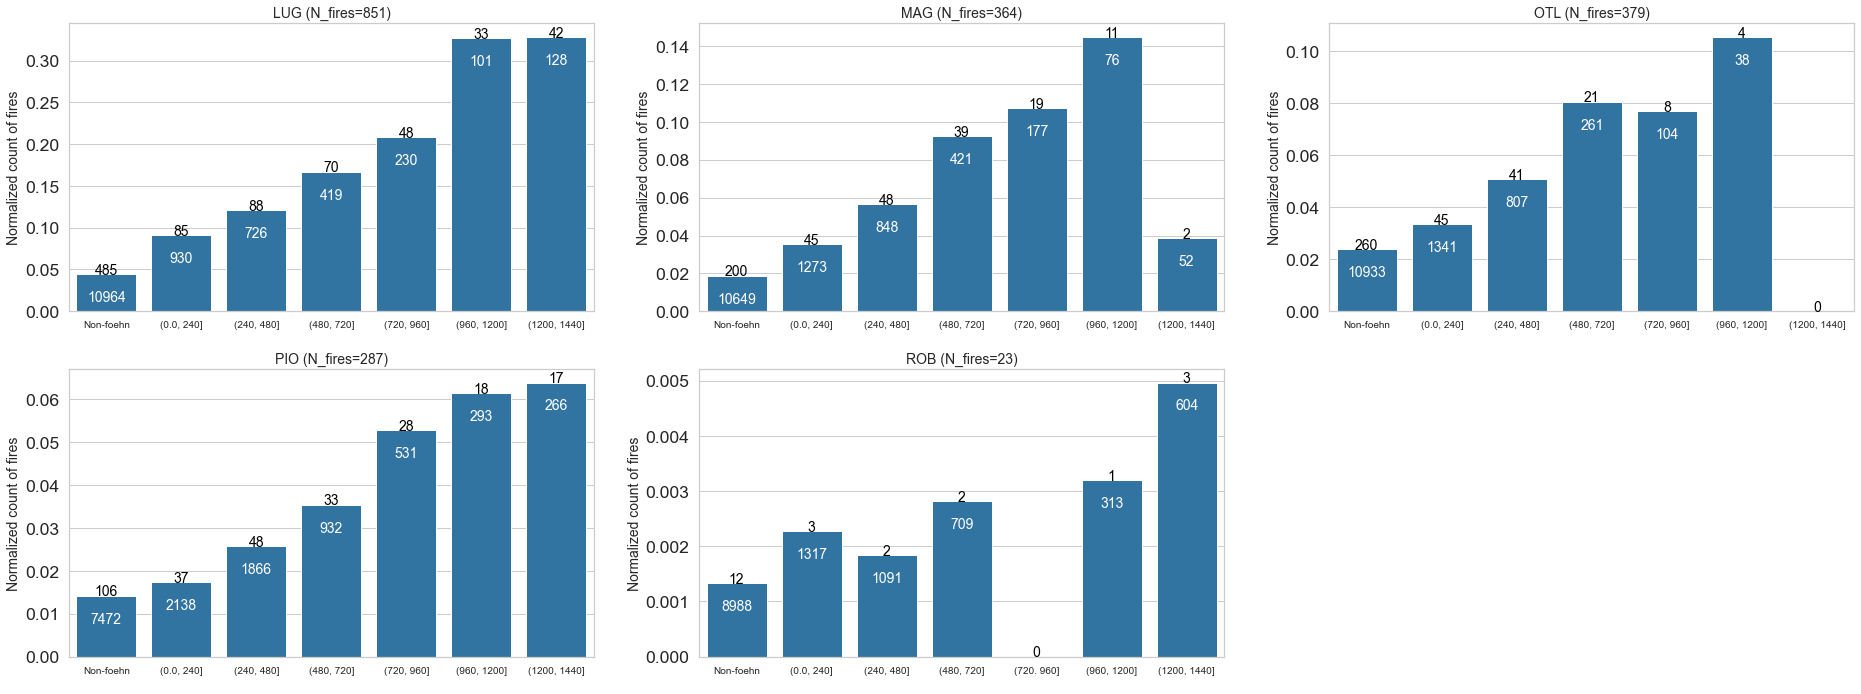

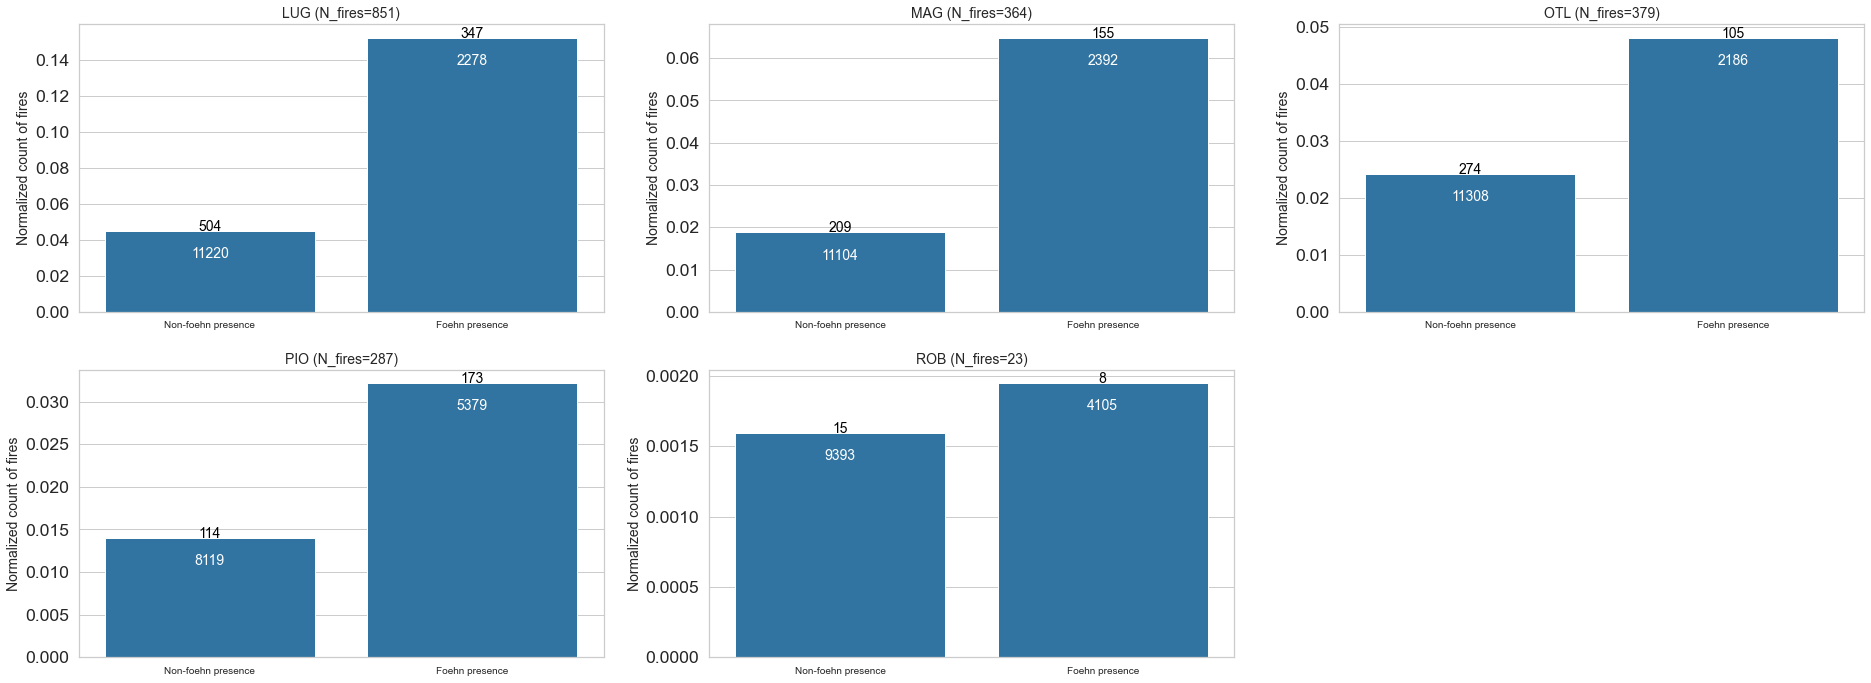

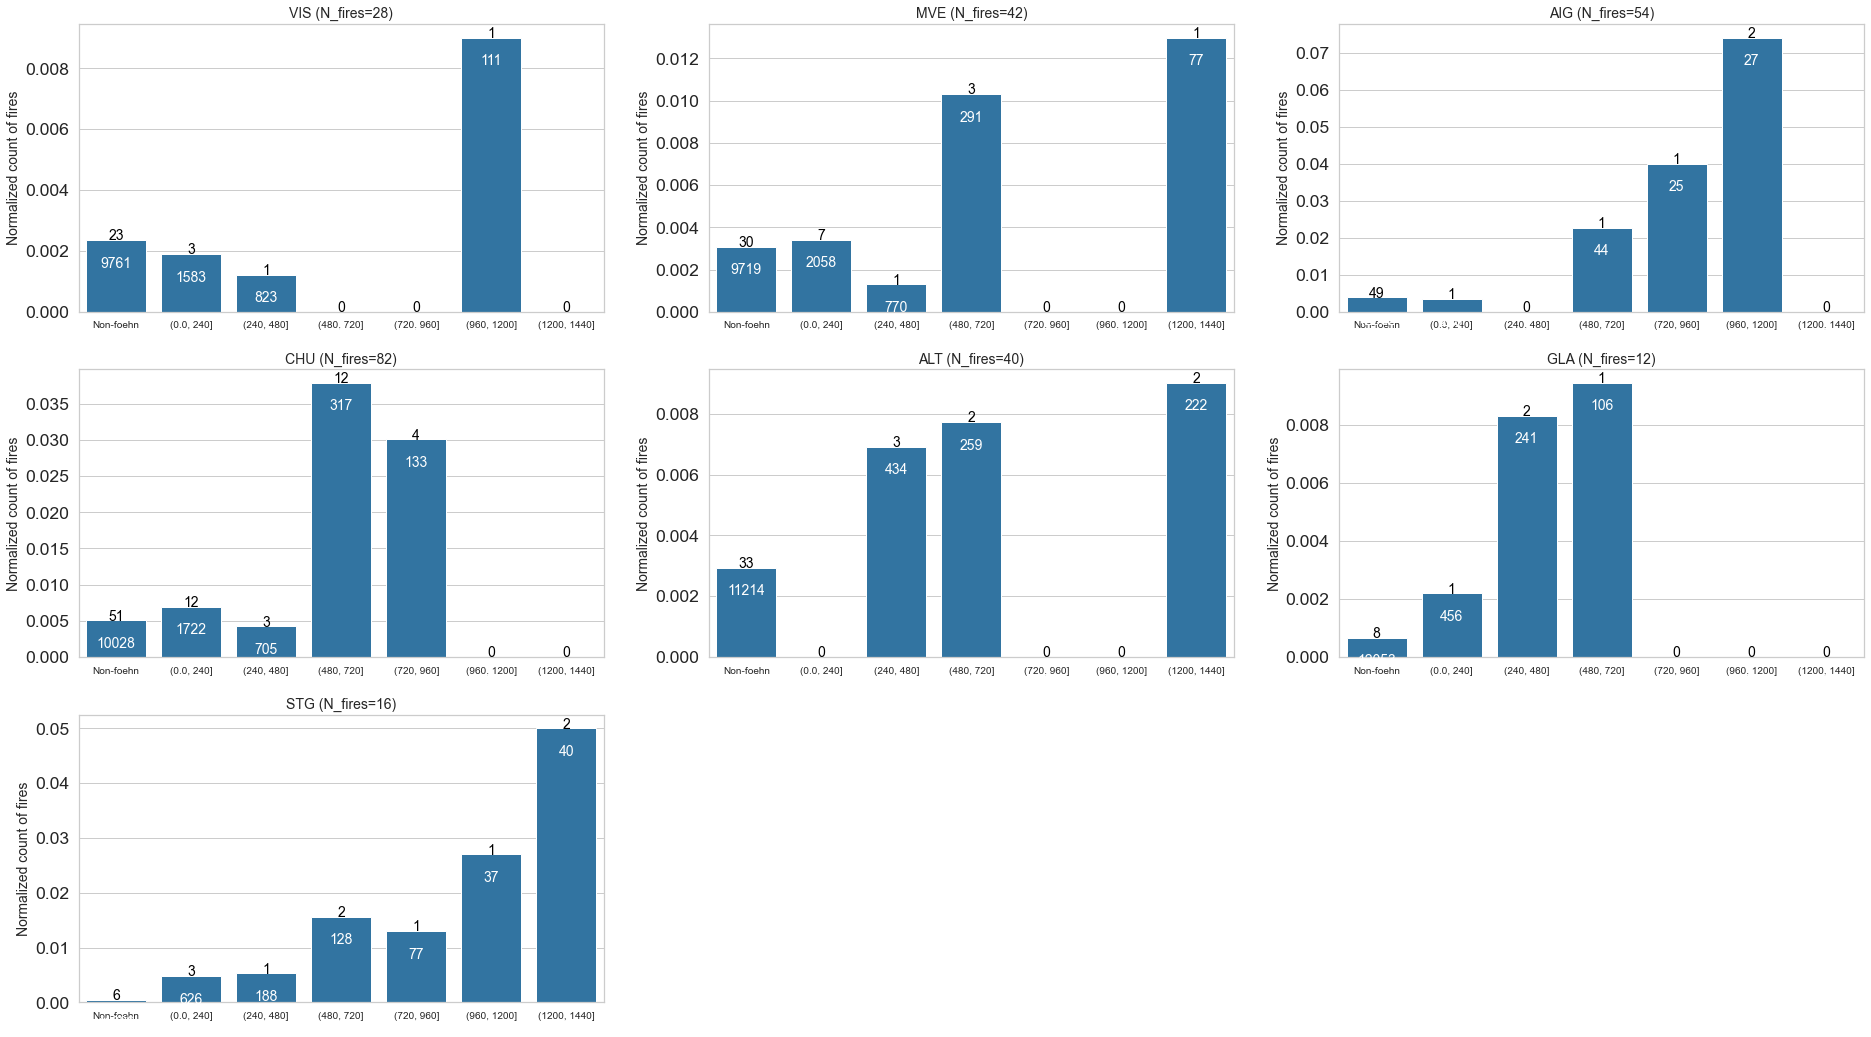

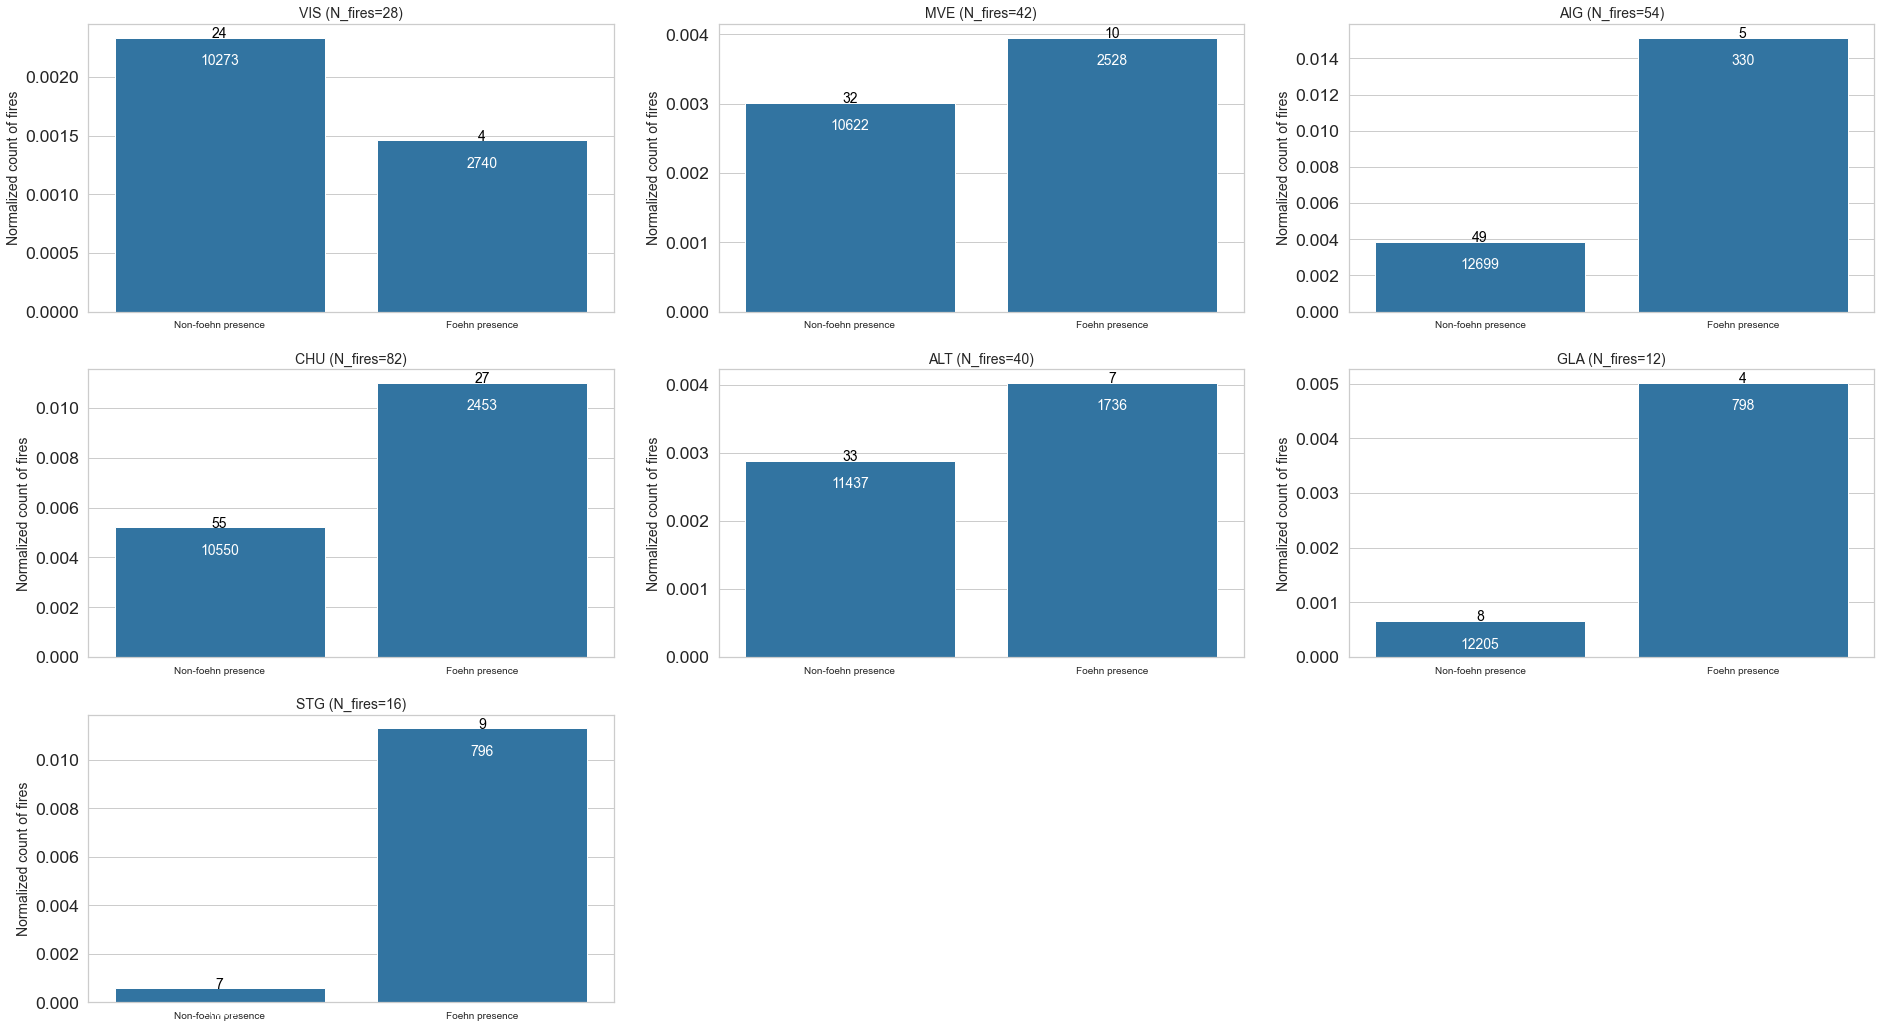

In [40]:
# Before fire start
for region in ["southern_switzerland", "northern_switzerland"]:
    print(region)
    plot_binned_fire_count_before_fire_start_single_station(df.loc[df["region"] == region, :], df_foehn=df_merge, hours=24, stations_in_region=regions[region])

## Temperature influence

In [ ]:
stations = [colname[0:3] for colname in df_foehn.filter(regex="foehn").columns]
north_foehn_stations = ["LUG", "OTL", "MAG", "COM", "GRO", "SBO", "PIO", "CEV", "ROB", "VIO"]
south_foehn_stations = set(stations) - set(north_foehn_stations)

for hour in [24,48]:
    plot_binned_fire_count_before_fire_start_temperature(df, df_foehn, hours=hour, stations=north_foehn_stations)

# Experimental

In [ ]:
df_foehn_copy=df_foehn.filter(regex="(foehn|TT)").copy() 
foehn_cols = df_foehn_copy.filter(regex="foehn").columns
temp_cols = df_foehn_copy.filter(regex="TT").columns

In [ ]:
df_foehn_copy.index = df_foehn["date"]

In [ ]:
df_foehn_copy = df_foehn_copy.between_time("18:00", "6:00", include_start=False, include_end=True)
df_foehn_copy.index = df_foehn_copy.index + pd.Timedelta("6h")

In [ ]:
group = df_foehn_copy.groupby(by=df_foehn_copy.index.date)
df_temp = group[temp_cols].first()- group[temp_cols].min()
df_f = group[foehn_cols].sum()*10
df_final = pd.concat([df_temp, df_f], axis=1)
df_final

In [ ]:
sns.histplot(df_final.loc[df_final["ALT_foehn"] >= 10, "ALT_TT"], stat="density", bins=range(0,15), color="r")
sns.histplot(df_final.loc[df_final["ALT_foehn"] == 0, "ALT_TT"],stat="density", bins=range(0,15))

In [ ]:
for i in df.index:
    station = df.loc[i, "closest_station"]
    start_date = pd.to_datetime(df.loc[i, "start date (solar time)"]).date()
    if start_date.year >1981:
        df.loc[i, "temp_decrease_during_night"] = df_final.loc[start_date, f"{station}_TT"]
        df.loc[i, "foehn_minutes_during_night"] = df_final.loc[start_date, f"{station}_foehn"]
    

In [ ]:
sns.histplot(df.loc[df["foehn_minutes_during_night"]>300, "temp_decrease_during_night"],bins=range(0,15),  color="r")
sns.histplot(df.loc[df["foehn_minutes_during_night"]==0, "temp_decrease_during_night"],bins=range(0,15))

In [ ]:
df_local = df.loc[df["foehn_minutes_during_night"]>0, :]

intervals = pd.cut(df_local["temp_decrease_during_night"], bins=6).value_counts().index
print(intervals.categories)

count_of_intervals = np.zeros(len(intervals))
print(count_of_intervals)
for col in temp_cols:
    station = col[0:3]
    if station == "GUE":
        continue
    df_loop = df_final.loc[df_final[f"{station}_foehn"]>0, :]
    #print(pd.cut(df_loop[col], bins=intervals.categories).value_counts())
    count_of_intervals = pd.cut(df_loop[col], bins=intervals.categories).value_counts()
    df_count = pd.cut(df_local.loc[df_local["closest_station"] == station, "temp_decrease_during_night"], bins=intervals.categories).value_counts(sort=False)
    plt.figure()
    sns.barplot(x=df_count.index, y=df_count/count_of_intervals)
    
# print(count_of_intervals/40)

# df_count = pd.cut(df_local["temp_decrease_during_night"], bins=6).value_counts(sort=False)
# print(df_count)
# print(df_count/count_of_intervals)
# sns.barplot(df_count.index, df_count/count_of_intervals*40)

In [ ]:
count_of_intervals

# Impact of foehn duration before fire on burned area

In [ ]:
# Plot all (or selected) plots for 6 and 12 hours after fire start
for var in ["", "decade", "fire_regime", "potential_foehn_species"]:
    for hours in [24,48]:
        plot_multiple_binned_burned_area_after_fire_start(df, hours=hours, variable="before", control_var=var)  

In [ ]:
# Plot all (or selected) plots for 6 and 12 hours after fire start
for var in ["", "decade", "fire_regime", "potential_foehn_species"]:
    for hours in [24,48]:
        plot_binary_binned_burned_area_after_fire_start(df, hours=hours, variable="before", control_var=var)  

In [ ]:
for var in ["", "decade", "fire_regime", "potential_foehn_species"]:
    for hours in [24,48]:
        test_binary_bins(df, hours=hours, variable="before", control_var=var, categories = control_var_categories[var])

In [ ]:
plot_binned_burned_area_before_and_after_fire_start(df, hours_before=24, hours_after=6)